In [1]:
# Data Manuiplation dependencies
# https://numpy.org/
import numpy as np
# https://pandas.pydata.org/
import pandas as pd 
#----------------------------------
# Visualisations dependencies
# https://matplotlib.org/
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#https://seaborn.pydata.org/
import seaborn as sns
#-------------------------------------
import warnings
import itertools
import os
#--------------------------------
sns.set(style="darkgrid")
# Modelling dependencies
#sklearn Dependencies
# All dependencies can be found here https://scikit-learn.org/stable/
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score,confusion_matrix, classification_report

# Ignore warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 90) # display all column of dataframe
pd.set_option('display.max_row', 100)
pd.set_option('display.max_colwidth', -1) 
#-----------------------------------------------------------------------

# Table of Contents

    * EDA
    
    * Correlation Map
     
    * Splitting and standardizing data for analysis
    
    * Mutual Feature Selection

    * Random Forest Model with Test Data
    
    * Random Forest Model with Validation Data
       
    * Random Forest Feature selection
        
    * Logistic Model with Test Data

    * Logistic Model with Validation Data
    
    * Logistic Feature selection
    
    * Gradient Boosting Model with Test Data     

    * Gradient Boosting Model with Validation Data
    
    * Gradient Boosting Feature selection
    
    * AdaBoosting Model with Test Data     

    * AdaBoosting Model with Validation Data
    
    * AdaBoosting Feature selection
    
    * Comparing Features
    

# EDA 

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)        


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [4]:
# import data and clean it
df = pd.read_csv(r'Data/Covariate_Features.csv')
#df = pd.read_csv('Covariate_Features.csv')
df.drop(['long','lat','Coordinates','Transformed_Long','Transformed_Lat','new_long','new_lat','Raster Value'],axis=1,inplace=True)
print('there are', df.shape[1], 'columns in the original dataframe')
print('there are', df.shape[0],'values in the original dataframe')
df.head()

there are 62 columns in the original dataframe
there are 47560 values in the original dataframe


Label     Band_1    Band_2    Band_3    Band_4    Band_5     Band_6  \
0  0      31.780069  0.739527  0.724089  2.688592  4.286776  11.415614   
1  0      31.813374  0.994895  0.985522  2.950744  4.480880  11.294726   
2  0      31.773357  0.926415  0.917783  2.884460  4.443317  11.304877   
3  0      31.735663  0.866177  0.854744  2.819666  4.407386  11.315222   
4  0      31.698177  0.811470  0.797522  2.756468  4.373125  11.326365   

     Band_7    Band_8  Band_9  Band_10    Band_11  Band_12   Band_13  Band_14  \
0  1.205231  2.369100  0.0     0.583    18.129000  12.066   2.265071  0.0       
1  1.439247  2.656430  0.0     0.825    18.056999  12.357   1.786768  0.0       
2  1.349879  2.575939  0.0     0.743    18.049999  12.268   2.265071  0.0       
3  1.260993  2.496295  0.0     0.651    18.042999  12.179   2.265071  0.0       
4  1.172700  2.417583  0.0     0.560    18.035999  12.089   2.265071  0.0       

    Band_15     Band_16    Band_17  Band_18    Band_19  Band_20    Band_21  \
0  0.286720  103.370560  20.921000  0.464    81.175003 -0.371    29.035999   
1  0.289738  103.442802  21.132000  0.414    80.906998 -0.293    29.257999   
2  0.288260  103.370560  21.089001  0.382    80.999001 -0.278    29.172001   
3  0.286658  103.370560  21.046000  0.371    81.091003 -0.278    29.087000   
4  0.284906  103.370560  21.003000  0.371    81.182999 -0.278    29.000999   

   Band_22    Band_23   Band_24  Band_25    Band_26  Band_27  Band_28  \
0  0.586    56.499001  0.646436  12.738   93.734001  10.195   0.0       
1  0.464    56.410999  0.692578  13.023   93.463997  10.131   0.0       
2  0.464    56.409000  0.636535  12.944   93.533997  10.178   0.0       
3  0.473    56.408001  0.592647  12.864   93.603996  10.226   0.0       
4  0.499    56.407001  0.559894  12.785   93.674004  10.274   0.0       

    Band_29  Band_30  Band_31  Band_32    Band_33   Band_34    Band_35  \
0  0.263034  3.0      126.0    20.0     34.562562  0.852259  14.920146   
1  0.263034  3.0      126.0    80.0     34.557776  0.839812  14.818560   
2  0.263034  3.0      50.0     80.0     34.558058  0.388908  14.822458   
3  0.263034  3.0      50.0     80.0     34.558058  0.560225  14.828402   
4  0.263034  3.0      50.0     20.0     34.558058  0.730593  14.847874   

   Band_36   Band_37    Band_38   Band_39   Band_40   Band_41   Band_42  \
0  4.0      0.000000  0.000000   0.869017  0.272429  0.690633  0.734774   
1  1.0      0.000000  0.000000   0.868700  0.271277  0.686508  0.734642   
2  1.0      0.000000  0.000000   0.868858  0.271756  0.688595  0.734720   
3  4.0      4.902162  13.694674  0.868858  0.271756  0.688595  0.734720   
4  6.0      0.000000  0.000000   0.869017  0.272429  0.690633  0.734774   

    Band_43   Band_44   Band_45   Band_46   Band_47   Band_48    Band_49  \
0  0.995996  0.517588  0.766863  0.585417  0.136775  0.233711  9.869781    
1  0.993765  0.515353  0.763166  0.585874  0.140325  0.231277  10.191885   
2  0.995055  0.516355  0.765130  0.585677  0.138392  0.231277  10.895460   
3  0.995055  0.516355  0.765130  0.585677  0.138392  0.232287  11.379321   
4  0.995996  0.517588  0.766863  0.585417  0.136775  0.232287  11.595043   

    Band_50   Band_51   Band_52   Band_53    Band_54    Band_55  Band_56  \
0  0.231839  0.568856  0.774400  2.789958  20.956160  19.635271  3.0       
1  0.232168  0.569326  0.772752  3.045210  20.672230  19.538315  3.0       
2  0.231948  0.569111  0.772752  2.977921  20.761681  19.540298  3.0       
3  0.231948  0.569111  0.772752  2.917063  20.851133  19.542603  3.0       
4  0.231839  0.568856  0.774400  2.857528  20.945560  19.545317  3.0       

   Band_57  Band_58     Band_59   Band_60  Band_61  
0  1.0      0.0      0.000000    0.409060 -1.0      
1  1.0      0.0      0.000000    0.405172 -1.0      
2  1.0      0.0      0.000000    0.407236 -1.0      
3  1.0      2.0      235.674698  0.407236  0.0      
4  1.0      0.0      0.000000    0.409060 -1.0

In [5]:
df.rename(columns= {'Band_1': ' fs_dist_fs_2020',
 'Band_2': ' fs_dist_hf_2019',
 'Band_3': ' fs_dist_hf1_2020',
 'Band_4': ' fs_dist_market_2020',
 'Band_5': ' fs_dist_mosques_2017',
 'Band_6': ' fs_dist_school_2020',
 'Band_7': ' fs_dist_school1_2018',
 'Band_8': ' fs_dist_well_2018',
 'Band_9': ' fs_electric_dist_2020',
 'Band_10': ' in_dist_rd_2016',
 'Band_11': ' in_dist_rd_intersect_2016',
 'Band_12': ' in_dist_waterway_2016',
 'Band_13': ' in_night_light_2016',
 'Band_14': ' ph_base_water_2010',
 'Band_15': ' ph_bio_dvst_2015',
 'Band_16': ' ph_climate_risk_2020',
 'Band_17': ' ph_dist_aq_veg_2015',
 'Band_18': ' ph_dist_art_surface_2015',
 'Band_19': ' ph_dist_bare_2015',
 'Band_20': ' ph_dist_cultivated_2015',
 'Band_21': ' ph_dist_herb_2015',
 'Band_22': ' ph_dist_inland_water_2018',
 'Band_23': ' ph_dist_open_coast_2020',
 'Band_24': ' ph_dist_riv_network_2007',
 'Band_25': ' ph_dist_shrub_2015',
 'Band_26': ' ph_dist_sparse_veg_2015',
 'Band_27': ' ph_dist_woody_tree_2015',
 'Band_28': ' ph_gdmhz_2005',
 'Band_29': ' ph_grd_water_2000',
 'Band_30': ' ph_hzd_index_2011',
 'Band_31': ' ph_land_c1_2019',
 'Band_32': ' ph_land_c2_2020',
 'Band_33': ' ph_max_tem_2019',
 'Band_34': ' ph_ndvi_2019',
 'Band_35': ' ph_pm25_2016',
 'Band_36': ' ph_slope_2000',
 'Band_37': ' po_pop_fb_2018',
 'Band_38': ' po_pop_un_2020',
 'Band_39': ' ses_an_visits_2016',
 'Band_40': ' ses_child_stunted_2018',
 'Band_41': ' ses_dpt3_2018',
 'Band_42': ' ses_hf_delivery_2018',
 'Band_43': ' ses_impr_water_src_2016',
 'Band_44': ' ses_ITN_2016',
 'Band_45': ' ses_m_lit_2018',
 'Band_46': ' ses_measles_2018',
 'Band_47': ' ses_odef_2018',
 'Band_48': ' ses_pfpr_2017',
 'Band_49': ' ses_preg_2017',
 'Band_50': ' ses_unmet_need_2018',
 'Band_51': ' ses_w_anemia_2018',
 'Band_52': ' ses_w_lit_2018',
 'Band_53': ' sh_dist_conflict_2020',
 'Band_54': ' sh_dist_mnr_pofw_2019',
 'Band_55': ' sh_dist_pofw_2019',
 'Band_56': ' sh_ethno_den_2020',
 'Band_57': ' sh_pol_relev_ethnic_gr_2019',
 'Band_58': ' uu_bld_count_2020',
 'Band_59': ' uu_bld_den_2020',
 'Band_60': ' uu_impr_housing_2015',
 'Band_61': ' uu_urb_bldg_2018'},inplace=True)
df.reset_index(inplace=True)
del df['index']
df.head()
#df.to_csv('Covariates_w_names.csv',index=False)

Label   fs_dist_fs_2020   fs_dist_hf_2019   fs_dist_hf1_2020  \
0  0      31.780069         0.739527          0.724089            
1  0      31.813374         0.994895          0.985522            
2  0      31.773357         0.926415          0.917783            
3  0      31.735663         0.866177          0.854744            
4  0      31.698177         0.811470          0.797522            

    fs_dist_market_2020   fs_dist_mosques_2017   fs_dist_school_2020  \
0  2.688592              4.286776               11.415614              
1  2.950744              4.480880               11.294726              
2  2.884460              4.443317               11.304877              
3  2.819666              4.407386               11.315222              
4  2.756468              4.373125               11.326365              

    fs_dist_school1_2018   fs_dist_well_2018   fs_electric_dist_2020  \
0  1.205231               2.369100            0.0                      
1  1.439247               2.656430            0.0                      
2  1.349879               2.575939            0.0                      
3  1.260993               2.496295            0.0                      
4  1.172700               2.417583            0.0                      

    in_dist_rd_2016   in_dist_rd_intersect_2016   in_dist_waterway_2016  \
0  0.583             18.129000                   12.066                   
1  0.825             18.056999                   12.357                   
2  0.743             18.049999                   12.268                   
3  0.651             18.042999                   12.179                   
4  0.560             18.035999                   12.089                   

    in_night_light_2016   ph_base_water_2010   ph_bio_dvst_2015  \
0  2.265071              0.0                  0.286720            
1  1.786768              0.0                  0.289738            
2  2.265071              0.0                  0.288260            
3  2.265071              0.0                  0.286658            
4  2.265071              0.0                  0.284906            

    ph_climate_risk_2020   ph_dist_aq_veg_2015   ph_dist_art_surface_2015  \
0  103.370560             20.921000             0.464                       
1  103.442802             21.132000             0.414                       
2  103.370560             21.089001             0.382                       
3  103.370560             21.046000             0.371                       
4  103.370560             21.003000             0.371                       

    ph_dist_bare_2015   ph_dist_cultivated_2015   ph_dist_herb_2015  \
0  81.175003          -0.371                     29.035999            
1  80.906998          -0.293                     29.257999            
2  80.999001          -0.278                     29.172001            
3  81.091003          -0.278                     29.087000            
4  81.182999          -0.278                     29.000999            

    ph_dist_inland_water_2018   ph_dist_open_coast_2020  \
0  0.586                       56.499001                  
1  0.464                       56.410999                  
2  0.464                       56.409000                  
3  0.473                       56.408001                  
4  0.499                       56.407001                  

    ph_dist_riv_network_2007   ph_dist_shrub_2015   ph_dist_sparse_veg_2015  \
0  0.646436                   12.738               93.734001                  
1  0.692578                   13.023               93.463997                  
2  0.636535                   12.944               93.533997                  
3  0.592647                   12.864               93.603996                  
4  0.559894                   12.785               93.674004                  

    ph_dist_woody_tree_2015   ph_gdmhz_2005   ph_grd_water_2000  \
0  10.195                    0.0             0.263034             
1  10.131                 

In [6]:
# create pie chart data
pie_data= count_values_in_column(df,"Label") # save data aS a dataframe
count_values_in_column(df,"Label")

Total  Percentage
2  32089  67.47     
0  15202  31.96     
1  269    0.57

<function matplotlib.pyplot.show(close=None, block=None)>

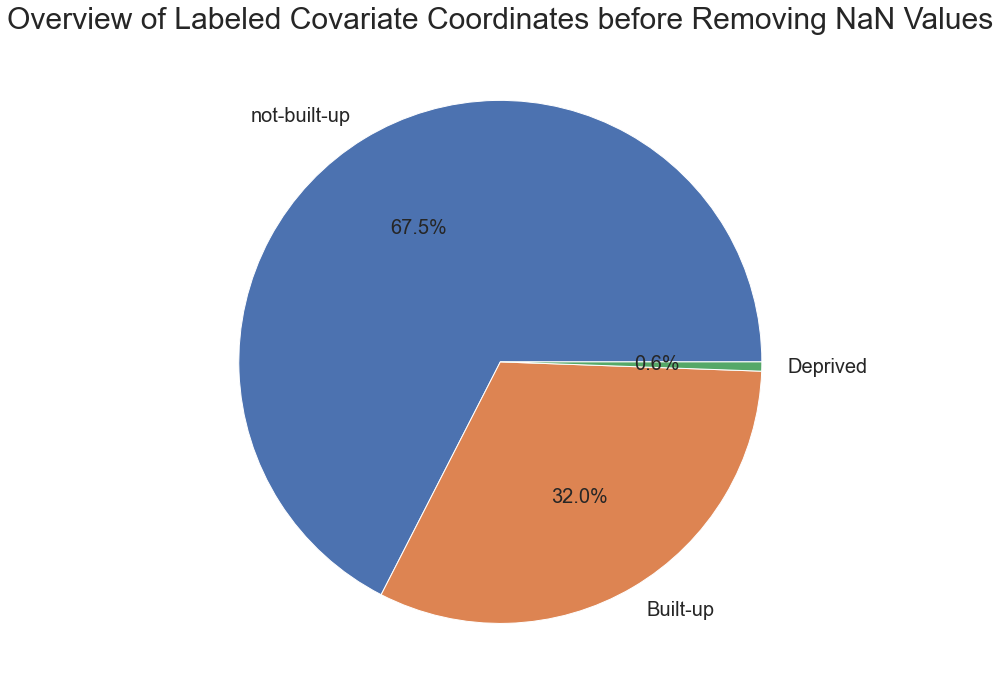

In [7]:
plt.figure(figsize=(10,10))
labels = ['not-built-up','Built-up', 'Deprived']
plt.title('Overview of Labeled Covariate Coordinates before Removing NaN Values', fontsize=30)
plt.pie(pie_data['Total'], labels=labels, autopct='%1.1f%%', textprops={'fontsize': 20})
plt.rcParams["axes.labelweight"] = "bold"
plt.tight_layout()
plt.show

In [8]:
#checking NAN on Covariate data values
null_values = df[df.isnull().any(axis=1)]
print('there are',df[df.isnull().any(axis=1)].shape[0], 'nan values in the dataframe')
print(null_values['Label'].value_counts())
df.dropna(inplace=True)
# removed Band 28 as there were nan values
df.drop([' ph_gdmhz_2005'], axis=1,inplace = True)

print('there are ',df.shape[0],'rows of data after removing nan values')

there are 1987 nan values in the dataframe
2    1986
0    1   
Name: Label, dtype: int64
there are  45573 rows of data after removing nan values


In [109]:
nan_values = pd.DataFrame(null_values.index,columns=['index_values'])
nan_values.to_csv('covariate_null_values.csv',index=False)

In [9]:
pie_data= count_values_in_column(df,"Label") # save data aS a dataframe
count_values_in_column(df,"Label")

Total  Percentage
2  30103  66.05     
0  15201  33.36     
1  269    0.59

<function matplotlib.pyplot.show(close=None, block=None)>

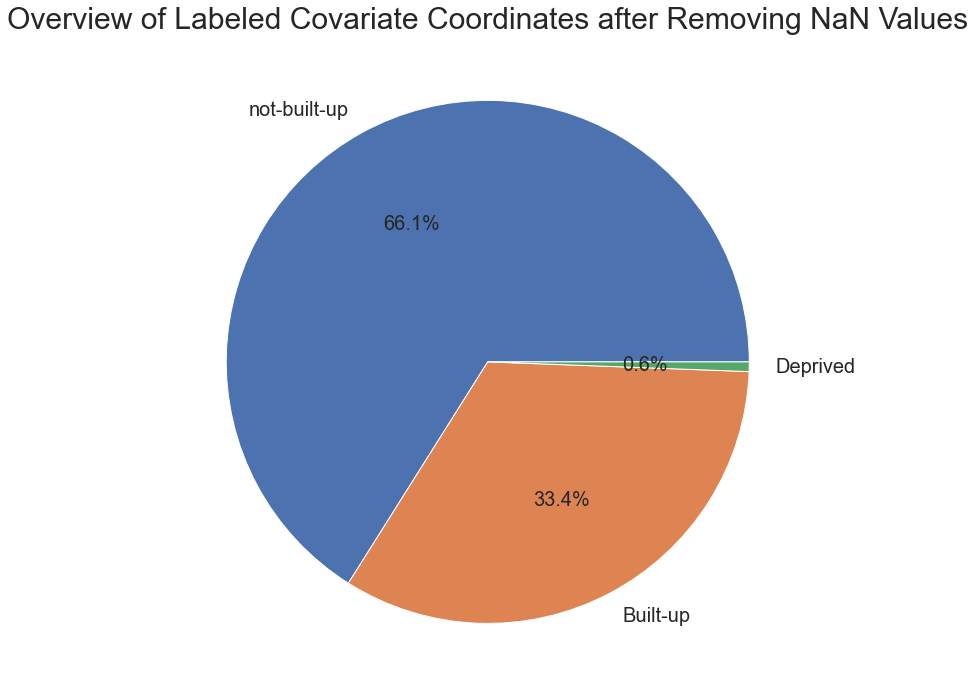

In [10]:
plt.figure(figsize=(10,10))
labels = ['not-built-up','Built-up', 'Deprived']
plt.title('Overview of Labeled Covariate Coordinates after Removing NaN Values', fontsize=30)
plt.pie(pie_data['Total'], labels=labels, autopct='%1.1f%%', textprops={'fontsize': 20})
plt.rcParams["axes.labelweight"] = "bold"
plt.tight_layout()
plt.show

In [11]:
#heat map on Covariate Features
plt.figure(figsize=(150, 150))
plt.title('Correlation Heat Map of Covariate Features\n', fontsize= 250)
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='YlOrRd', square=True)
plt.tight_layout()
plt.show()

In [12]:

#df.drop('Label',axis=1).corr()
df.corr()
df.shape

(45573, 61)

In [13]:
# create dataframe 'df_corr' of all correlation values
# correlation values on for 0 and 1
df_corr =df[df['Label'].isin([0,1])]
# remove 'label' column from correlation datafram
df_corr = df_corr.drop('Label',axis=1)
print(df_corr.shape)
# unstack correlation matrix
correlation = pd.DataFrame(df_corr.corr().unstack().sort_values(ascending=False).reset_index())
# remove rows that are correlated with themselves as the correlation values would be 1
corr = correlation.loc[lambda x : x['level_0'] != x['level_1']].reset_index(drop=True)
# rename correlation row
corr = corr.rename(columns={0: 'Correlation_Values'})
corr.sort_values(by = 'level_0',ascending=False).reset_index()
corr.drop_duplicates(subset='Correlation_Values',inplace=True)
# remove every odd numbered index as it is the same value of the even cell above it
print('the skew of the correlation coefficient values for covariate features is', corr.skew())
corr.shape

(15470, 60)
the skew of the correlation coefficient values for covariate features is Correlation_Values    0.017183
dtype: float64


(1770, 3)

<Figure size 1080x720 with 0 Axes>

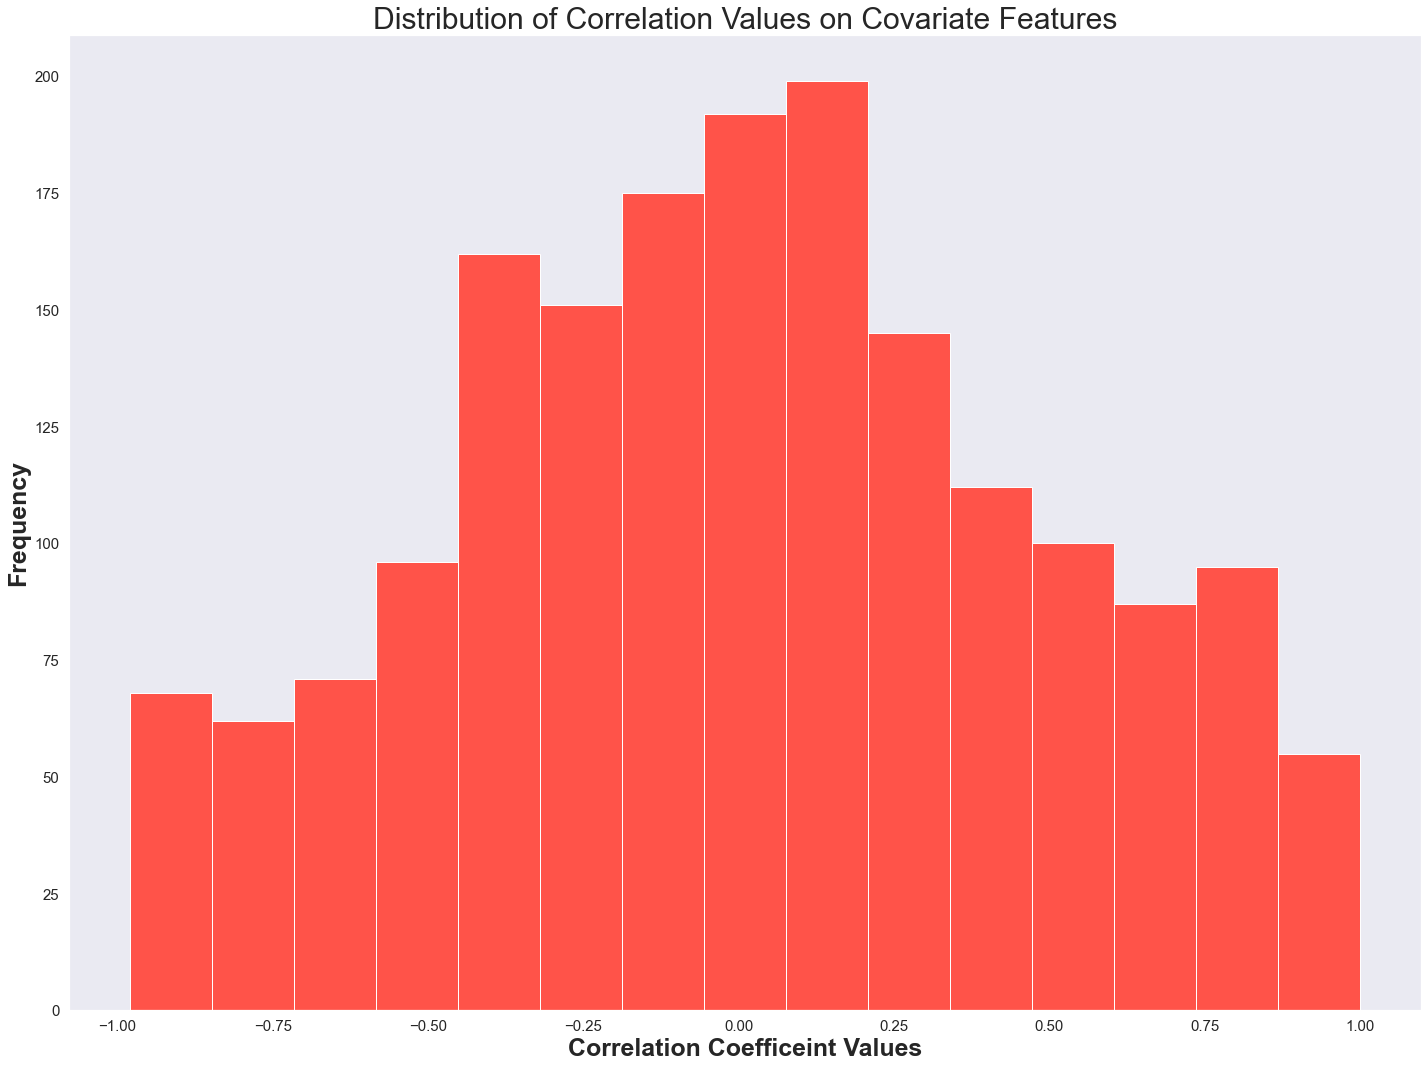

In [14]:
#created Histogram of Correlation Values
plt.figure(figsize= (15,10), facecolor='white')
plt.rcParams["figure.figsize"] = (20,15)
corr.plot(kind='hist',bins=15, color ='#ff5349')
plt.title('Distribution of Correlation Values on Covariate Features',fontsize=30)
plt.xlabel('Correlation Coefficeint Values',fontsize=25)
plt.ylabel('Frequency',fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(False)
plt.legend().remove()
#plt.style.use('classic')
plt.tight_layout()
plt.show()

# Splitting and standardizing data for analysis

In [15]:
# Make directory to save results 
directory = os.path.dirname('result/cv_results/GridSearchCV/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [16]:
# select 0 and 1 classes
df =df[df['Label'].isin([0,1])]
X = df.drop('Label', axis=1)
y = df['Label']
# train, val, test split 60/20/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

In [17]:
# create pie chart data
pie_data= count_values_in_column(df,"Label") # save data aS a dataframe
count_values_in_column(df,"Label")

Total  Percentage
0  15201  98.26     
1  269    1.74

<function matplotlib.pyplot.show(close=None, block=None)>

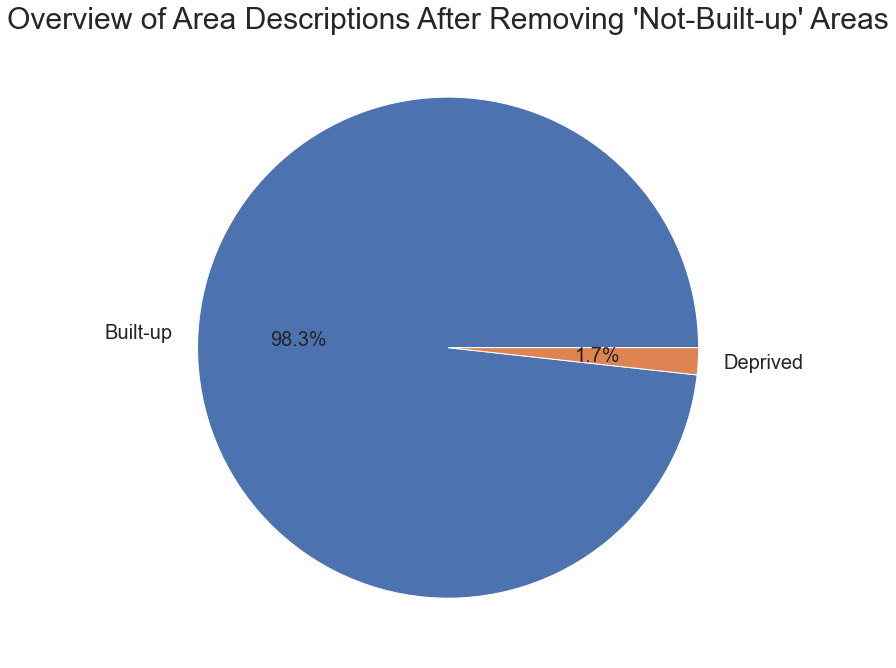

In [18]:
#created Pie chart after removing Not-Built-up areas
plt.figure(figsize= (10,10))
labels = ['Built-up', 'Deprived']
plt.title("Overview of Area Descriptions After Removing 'Not-Built-up' Areas", fontsize=30)
plt.pie(pie_data['Total'], labels=labels, autopct='%1.1f%%', textprops={'fontsize': 20})
plt.rcParams["axes.labelweight"] = "bold"
plt.tight_layout()
plt.show

In [19]:
# Standardize Features for training and test set
# The StandardScaler
ss = StandardScaler()
# Standardize the training data
X_train = ss.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train, columns= X.columns)
# Standardize Validation data
X_val = ss.fit_transform(X_val)
X_val_scaled = pd.DataFrame(X_val, columns= X.columns)
#Standardize Testing data
X_test = ss.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test, columns= X.columns)

In [20]:
# Check shape of split data 
print('There are', X_train_scaled.shape[0], 'rows in the train data')
print('There are', X_val_scaled.shape[0], 'rows in the validation data')
print('There are', X_test_scaled.shape[0], 'rows in the test data')

There are 9282 rows in the train data
There are 3094 rows in the validation data
There are 3094 rows in the test data


In [21]:
X_train_scaled.head()

fs_dist_fs_2020   fs_dist_hf_2019   fs_dist_hf1_2020  \
0 -0.277603          0.248485         -0.666164            
1 -0.583591         -0.995591         -0.518232            
2  1.851194          1.152155          1.328285            
3 -0.645543         -0.501282         -0.706956            
4 -0.793231         -0.709442         -0.833501            

    fs_dist_market_2020   fs_dist_mosques_2017   fs_dist_school_2020  \
0 -0.760490             -0.880756              -0.503723               
1 -0.689608             -0.928435              -0.542310               
2  2.309354              1.864773               2.024959               
3 -0.332919             -0.358974              -0.596167               
4 -0.740198             -0.675836              -0.692839               

    fs_dist_school1_2018   fs_dist_well_2018   fs_electric_dist_2020  \
0 -0.679862              -1.132726           -1.679680                 
1 -0.400109              -0.223398            0.595351                 
2  1.847952               0.832583            0.595351                 
3 -0.781930               0.309166            0.595351                 
4 -0.905136              -0.566855            0.595351                 

    in_dist_rd_2016   in_dist_rd_intersect_2016   in_dist_waterway_2016  \
0 -0.532111         -0.458912                   -0.489627                 
1 -0.656520         -0.671912                   -0.995146                 
2  0.759767          1.987358                    1.683794                 
3  0.231789         -0.468332                   -0.665383                 
4 -0.673968         -0.640686                    0.133506                 

    in_night_light_2016   ph_base_water_2010   ph_bio_dvst_2015  \
0 -0.714700              1.496055            -0.062092            
1  1.342575              1.496055            -0.062092            
2 -0.846761             -0.809341             1.171768            
3 -0.488917              1.496055            -0.062092            
4 -0.155634              0.436569            -0.062092            

    ph_climate_risk_2020   ph_dist_aq_veg_2015   ph_dist_art_surface_2015  \
0 -0.087985              -0.393177             -0.357145                    
1  1.852727              -0.499468              0.244076                    
2  1.547046              -0.614030              0.985708                    
3  1.667880              -0.630160             -0.115135                    
4 -0.617878               0.185218             -0.949233                    

    ph_dist_bare_2015   ph_dist_cultivated_2015   ph_dist_herb_2015  \
0 -0.651916           -0.219403                 -0.975576             
1 -0.298191            1.322716                 -0.768442             
2  1.874924           -1.025618                  0.764080             
3 -0.460797           -0.167007                 -1.175970             
4 -0.679765            0.297116                  0.464102             

    ph_dist_inland_water_2018   ph_dist_open_coast_2020  \
0 -0.479918                   -0.598770                   
1 -0.866232                   -0.846633                   
2 -0.370538                   -0.939766                   
3 -0.762862                   -0.787442                   
4  0.789367                    0.319248                   

    ph_dist_riv_network_2007   ph_dist_shrub_2015   ph_dist_sparse_veg_2015  \
0 -0.092694                  -0.749173            -0.885646                   
1 -1.558207                   0.194803            -0.538377                   
2  1.093291                  -0.583781             1.837554                   
3 -0.356686                  -0.079208            -0.710963                   
4  0.327952                   0.200016            -0.672346                   

    ph_dist_woody_tree_2015   ph_grd_water_2000   ph_hzd_index_2011  \
0 -0.386293                  0.27259             0.828755             
1 -0.511335                  0.27259            -0.523179    

# Mutual Infomration Feature Selection 

In [92]:
#run select k best
np.random.seed(42)
fs_fit_fscore = SelectKBest(mutual_info_classif,  k='all')
fs_fit_fscore.fit_transform(X_train_scaled,y_train)
fs_indicies_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:60]
best_features_fscore = X.columns[fs_indicies_fscore].values
feature_importances_fscore = fs_fit_fscore.scores_[fs_indicies_fscore]
feature_importances_fscore

data_tuples = list(zip(best_features_fscore, feature_importances_fscore))
m_info_0_1 = pd.DataFrame(data_tuples,columns = ['Covariate_features','values'])
m_info_0_1.head()


Covariate_features    values
0   ph_climate_risk_2020  0.044812
1   ph_dist_bare_2015     0.044808
2   in_night_light_2016   0.043917
3   uu_bld_den_2020       0.037769
4   ses_hf_delivery_2018  0.037027

In [23]:
m_info_0_1.to_csv(path_or_buf='feature_selection/Covariate/' + 'Covariate_minfo_features_0_1.csv',index=False)

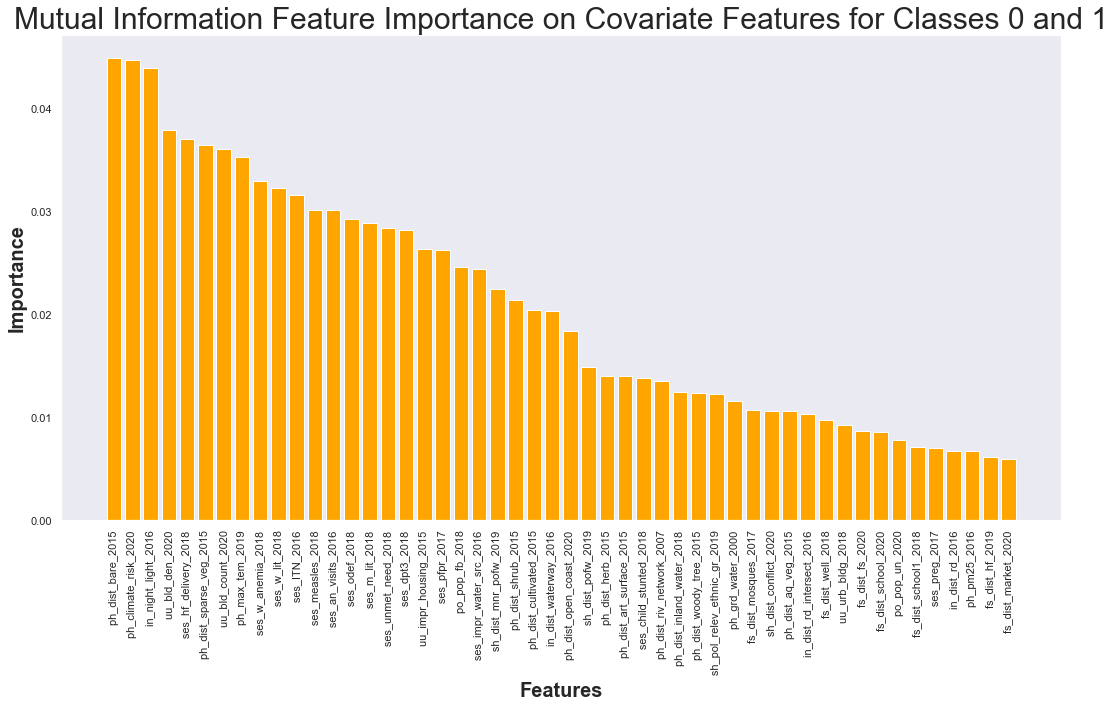

In [24]:
#Create a figure for Random Forest Feature Importance
fig = plt.figure(figsize=(15, 10), facecolor='white')

# Implement me
# The bar plot of the top 5 feature importance
plt.bar(m_info_0_1['Covariate_features'][:50], m_info_0_1['values'][:50], color='orange')

# Set x-axis
plt.title('Mutual Information Feature Importance on Covariate Features for Classes 0 and 1', fontsize=30)
plt.xlabel('Features', fontsize = 20)
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('Importance', fontsize = 20)
plt.grid(False)
# Save and show the figure
plt.tight_layout()
plt.show()

# Random Forest Model with Test Data

In [25]:
models = {'rfc': RandomForestClassifier( random_state=42)}
pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])
param_grids = {}
# Random Forest Hyper Parameters
# The grids for min_samples_split
min_samples_split_grids = [2,10, 20, 50, 100]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1,10, 20, 50, 100]

# Update param_grids
param_grids['rfc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

In [26]:
# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []
# GridSearchCV
gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=1,
                      cv=StratifiedKFold(),
                      return_train_score=True)
        
# Fit the pipeline
gs = gs.fit(X_train_scaled, y_train)
    
# Update best_score_params_estimator_gs
best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
# Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
# Get the important columns in cv_results
important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
# Move the important columns ahead
cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

best_score                                                     best_param  \
0  0.951369    {'model__min_samples_leaf': 1, 'model__min_samples_split': 2}   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [27]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]


In [28]:
# Predict using test data
y_test_pred = best_estimator_gs.predict(X_test_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision                     Recall  \
0  [0.9963780046098123, 1.0]  [1.0, 0.8382352941176471]   

                                   F1-score  
0  [0.9981857166419265, 0.9119999999999999]

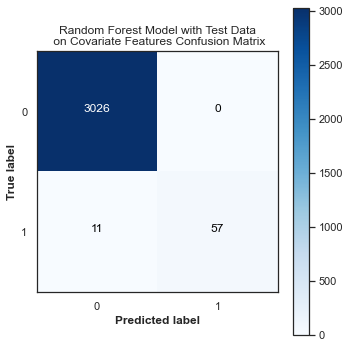

In [29]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_test,y_test_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1"]
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.title('Random Forest Model with Test Data\n on Covariate Features Confusion Matrix')
plt.tight_layout()
plt.show()

In [30]:
print('Random Forest Model with Test Data\n on Covariate Features Classification Report')
print(classification_report(y_test,y_test_pred))

Random Forest Model with Test Data
 on Covariate Features Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3026
           1       1.00      0.84      0.91        68

    accuracy                           1.00      3094
   macro avg       1.00      0.92      0.96      3094
weighted avg       1.00      1.00      1.00      3094



# Random Forest Model with Validation Data

In [31]:
# Predict using Validation data
y_val_pred = best_estimator_gs.predict(X_val_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_val, y_val_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision  \
0  [0.9977034120734908, 0.9565217391304348]   

                                     Recall  \
0  [0.9993427538613211, 0.8627450980392157]   

                                   F1-score  
0  [0.9985224101132819, 0.9072164948453608]

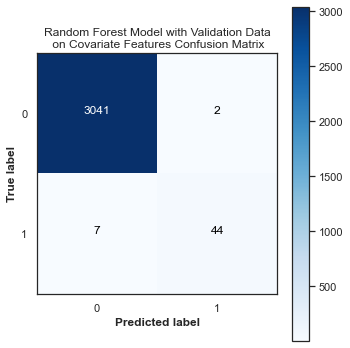

In [32]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_val,y_val_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1"]
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.title('Random Forest Model with Validation Data\n on Covariate Features Confusion Matrix')
plt.tight_layout()
plt.show()

In [33]:
print('Random Forest Model with Validation Data\n on Covariate Features Classification Report')
print(classification_report(y_val,y_val_pred))

Random Forest Model with Validation Data
 on Covariate Features Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3043
           1       0.96      0.86      0.91        51

    accuracy                           1.00      3094
   macro avg       0.98      0.93      0.95      3094
weighted avg       1.00      1.00      1.00      3094



# Random Forest Feature Importance

In [34]:
target="label"
# Get the best_score, best_param and best_estimator of random forest obtained by GridSearchCV
best_score_rfc, best_param_rfc, best_estimator_rfc = best_score_params_estimator_gs[0]

# Get the dataframe of feature and importance
df_fi_rfc_0_1 = pd.DataFrame(np.hstack((np.setdiff1d(X.columns, [target]).reshape(-1, 1), best_estimator_rfc.named_steps['model'].feature_importances_.reshape(-1, 1))),
                         columns=['Features', 'Importance'])

# Sort df_fi_rfc in descending order of the importance
df_fi_rfc_0_1 = df_fi_rfc_0_1.sort_values(ascending=False, by='Importance').reset_index(drop=True)

# Print the first 5 rows of df_fi_rfc
df_fi_rfc_0_1.head()

#save results as csv
df_fi_rfc_0_1.to_csv(path_or_buf='feature_selection/Covariate/' + 'Covariate_best_random_forest_features_0_1.csv',index=False)

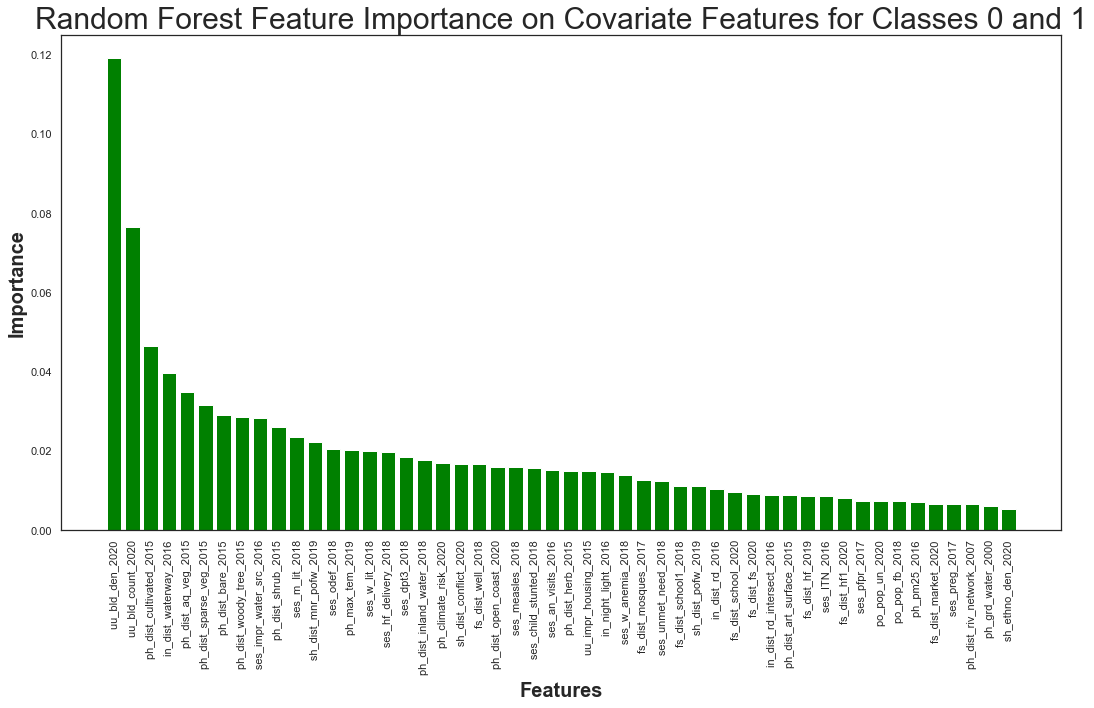

In [35]:
#Create a figure for Random Forest Feature Importance
fig = plt.figure(figsize=(15, 10))

# Implement me
# The bar plot of the top 5 feature importance
plt.bar(df_fi_rfc_0_1['Features'][:50], df_fi_rfc_0_1['Importance'][:50], color='green')

# Set x-axis
plt.title('Random Forest Feature Importance on Covariate Features for Classes 0 and 1', fontsize=30)
plt.xlabel('Features', fontsize = 20)
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('Importance', fontsize = 20)

# Save and show the figure
plt.tight_layout()
plt.show()

# Logistic Model with Testing Data

In [36]:
# Logistic model construction
models = {'lr': LogisticRegression(solver= "lbfgs", random_state=42)}


pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])
param_grids = {}

# Logistic Regression hyperparamters

# The parameter grid of tol
tol_grid = [10 ** -5, 10 ** -4, 10 ** -3, 10 ** -2, 10 ** -1]

# The parameter grid of C
C_grid = [0.001, 0.0001, 0.1, 1, 10]

param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid}]


In [37]:
# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []
# GridSearchCV
gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=-1,
                      cv=StratifiedKFold(),
                      return_train_score=True)
        
# Fit the pipeline
gs = gs.fit(X_train_scaled, y_train)
    
# Update best_score_params_estimator_gs
best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
# Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
# Get the important columns in cv_results
important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
# Move the important columns ahead
cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

best_score                             best_param  \
0  0.929718    {'model__C': 10, 'model__tol': 1e-05}   

                                           best_estimator  
0  (LogisticRegression(C=10, random_state=42, tol=1e-05))

In [38]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Predict using test data
y_test_pred = best_estimator_gs.predict(X_test_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision  \
0  [0.9967029343883943, 0.9508196721311475]   

                                     Recall  \
0  [0.9990085922009253, 0.8529411764705882]   

                                   F1-score  
0  [0.9978544314243274, 0.8992248062015503]

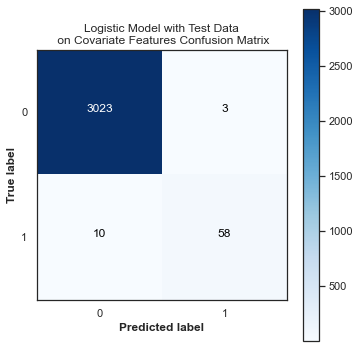

In [39]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_test,y_test_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1"]
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.title('Logistic Model with Test Data\n on Covariate Features Confusion Matrix')
plt.show()

In [40]:
print('Logistic Model with Test Data\n on Covariate Features Classification Report') 
print(classification_report(y_test,y_test_pred))

    

Logistic Model with Test Data
 on Covariate Features Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3026
           1       0.95      0.85      0.90        68

    accuracy                           1.00      3094
   macro avg       0.97      0.93      0.95      3094
weighted avg       1.00      1.00      1.00      3094



# Logistic Model with Validation Data

In [41]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Predict using test data
y_val_pred = best_estimator_gs.predict(X_val_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_val, y_val_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision  \
0  [0.9973736047275115, 0.8958333333333334]   

                                     Recall  \
0  [0.9983568846533026, 0.8431372549019608]   

                                   F1-score  
0  [0.9978650024634587, 0.8686868686868686]

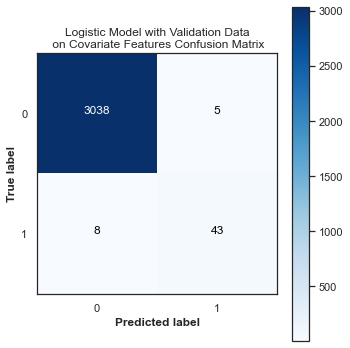

In [42]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_val,y_val_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1"]
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.title('Logistic Model with Validation Data\n on Covariate Features Confusion Matrix')
plt.tight_layout()
plt.show()

In [43]:
print('Logistic Model with Test Data\n on Covariate Features Classification Report')  
print(classification_report(y_val,y_val_pred))


Logistic Model with Test Data
 on Covariate Features Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3043
           1       0.90      0.84      0.87        51

    accuracy                           1.00      3094
   macro avg       0.95      0.92      0.93      3094
weighted avg       1.00      1.00      1.00      3094



# Logistic Feature Importance

In [44]:
# Evaluate odds of each variable and sort by odds value
odds = np.exp(best_estimator_gs["model"].coef_[0])
best_log =pd.DataFrame(odds, X_train_scaled.columns, columns=['odds']).sort_values(by='odds', ascending=False)
best_log.reset_index(inplace=True)
best_log.rename(columns={'index':'Covariate_features','odds':'values'},inplace=True)
best_log.head(10)

Covariate_features       values
0   ses_odef_2018              1050.671279
1   ses_impr_water_src_2016    484.132542 
2   in_dist_rd_intersect_2016  244.741557 
3   ses_w_anemia_2018          37.738917  
4   fs_dist_school_2020        15.244518  
5   ses_an_visits_2016         9.847593   
6   ses_measles_2018           6.737049   
7   ph_dist_art_surface_2015   6.464724   
8   fs_dist_market_2020        6.276335   
9   ph_dist_herb_2015          5.400897

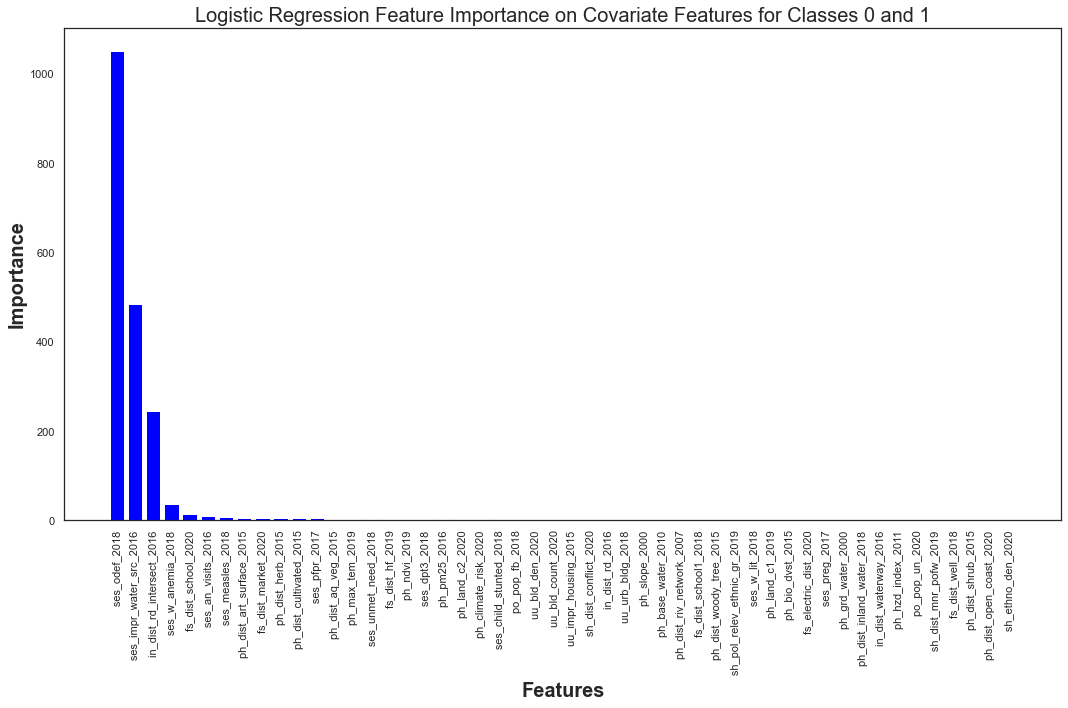

In [45]:
#Create a figure
fig = plt.figure(figsize=(15, 10))

# Implement me
# The bar plot of the top 5 feature importance
plt.bar(best_log['Covariate_features'][:50], best_log['values'][:50], color='blue')

# Set x-axis
plt.title('Logistic Regression Feature Importance on Covariate Features for Classes 0 and 1', fontsize=20)
plt.xlabel('Features',fontsize=20)
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('Importance', fontsize=20)

# Save and show the figure
plt.tight_layout()
plt.show()

In [46]:
#save best logistic features in csv file
best_log.to_csv(path_or_buf='feature_selection/Covariate/' + 'Covariate_best_logistic_features_0_1.csv',index=False)



# Gradient Boosting with Testing Data

In [47]:
# hyper parameters for testing
parameter_space = {
    'loss': ['deviance'],
    'criterion': ['friedman_mse', 'mse'],
    'n_estimators': [100],
    'subsample': [1.0, 0.6],
    "learning_rate": [0.01, 0.05],
    "min_samples_split": np.linspace(0.1, 0.5, 3),
    "min_samples_leaf": np.linspace(0.1, 0.5, 3),
    "max_depth": [3, 8],
    "max_features": ["log2", "sqrt"],
}

clf = GradientBoostingClassifier(random_state=42)

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []
# Run Gridsearch
gs = GridSearchCV(clf, parameter_space,
                      scoring='f1_macro',
                      n_jobs=-1,
                      cv=StratifiedKFold(),
                      return_train_score=True)


# run model
gs = gs.fit(X_train_scaled, y_train)

# Update best_score_params_estimator_gs
best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
# Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
# Get the important columns in cv_results
important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
# Move the important columns ahead
cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]


# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

best_score  \
0  0.869261     

                                                                                                                                                                                                   best_param  \
0  {'criterion': 'friedman_mse', 'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 100, 'subsample': 1.0}   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [48]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]


In [49]:
#best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Predict using test data
y_test_pred = best_estimator_gs.predict(X_test_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision                     Recall  \
0  [0.9911562397641664, 1.0]  [1.0, 0.6029411764705882]   

                                 F1-score  
0  [0.99555848001316, 0.7522935779816513]

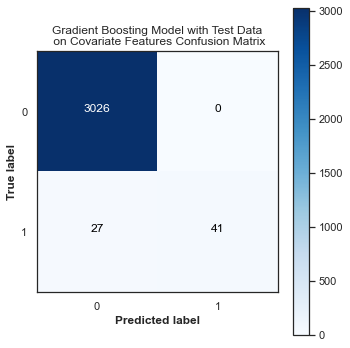

In [50]:
# Gradient Boosting Results
# create confusion matrix for Gradient Boosting test data
sns.set(style="white")
cnf_matrix = confusion_matrix(y_test, y_test_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1"]
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.title('Gradient Boosting Model with Test Data\n on Covariate Features Confusion Matrix')
plt.tight_layout()
plt.show()

In [51]:
print('Gradient Boosting Model with Testing Data\n on Covariate Features Classification Report') 
print(classification_report(y_test,y_test_pred))

Gradient Boosting Model with Testing Data
 on Covariate Features Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3026
           1       1.00      0.60      0.75        68

    accuracy                           0.99      3094
   macro avg       1.00      0.80      0.87      3094
weighted avg       0.99      0.99      0.99      3094



# Gradient Boosting with Validation Data

In [52]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Predict using test data
y_val_pred = best_estimator_gs.predict(X_val_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_val, y_val_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision                     Recall  \
0  [0.9947695325269696, 1.0]  [1.0, 0.6862745098039216]   

                                  F1-score  
0  [0.9973779088823337, 0.813953488372093]

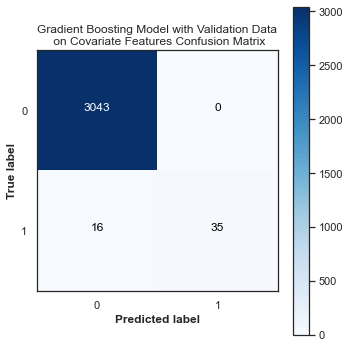

In [53]:
# Gradient Boosting Results
# create confusion matrix for Gradient Boosting test data
sns.set(style="white")
cnf_matrix = confusion_matrix(y_val, y_val_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1"]
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.title('Gradient Boosting Model with Validation Data\n on Covariate Features Confusion Matrix')
plt.tight_layout()
plt.show()

In [54]:
print('Gradient Boosting Model with Validation Data\n on Covariate Features Classification Report') 
print(classification_report(y_val,y_val_pred))

Gradient Boosting Model with Validation Data
 on Covariate Features Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3043
           1       1.00      0.69      0.81        51

    accuracy                           0.99      3094
   macro avg       1.00      0.84      0.91      3094
weighted avg       0.99      0.99      0.99      3094



In [55]:
target="label"
# Get the best_score, best_param and best_estimator of random forest obtained by GridSearchCV
best_score_gb, best_param_gb, best_estimator_gb = best_score_params_estimator_gs[0]

# Get the dataframe of feature and importance
df_fi_gb_0_1 = pd.DataFrame(np.hstack((np.setdiff1d(X.columns, [target]).reshape(-1, 1), best_estimator_gb.feature_importances_.reshape(-1, 1))),
                         columns=['Features', 'Importance'])

In [56]:
# Sort df_fi_rfc in descending order of the importance
df_fi_gb_0_1 = df_fi_gb_0_1.sort_values(ascending=False, by='Importance').reset_index(drop=True)

#save results as csv
df_fi_gb_0_1.to_csv(path_or_buf='feature_selection/Covariate/' + 'Covariate_best_gradient_boosting_features_0_1.csv',index=False)

# Gradient Boosting Feature Importance

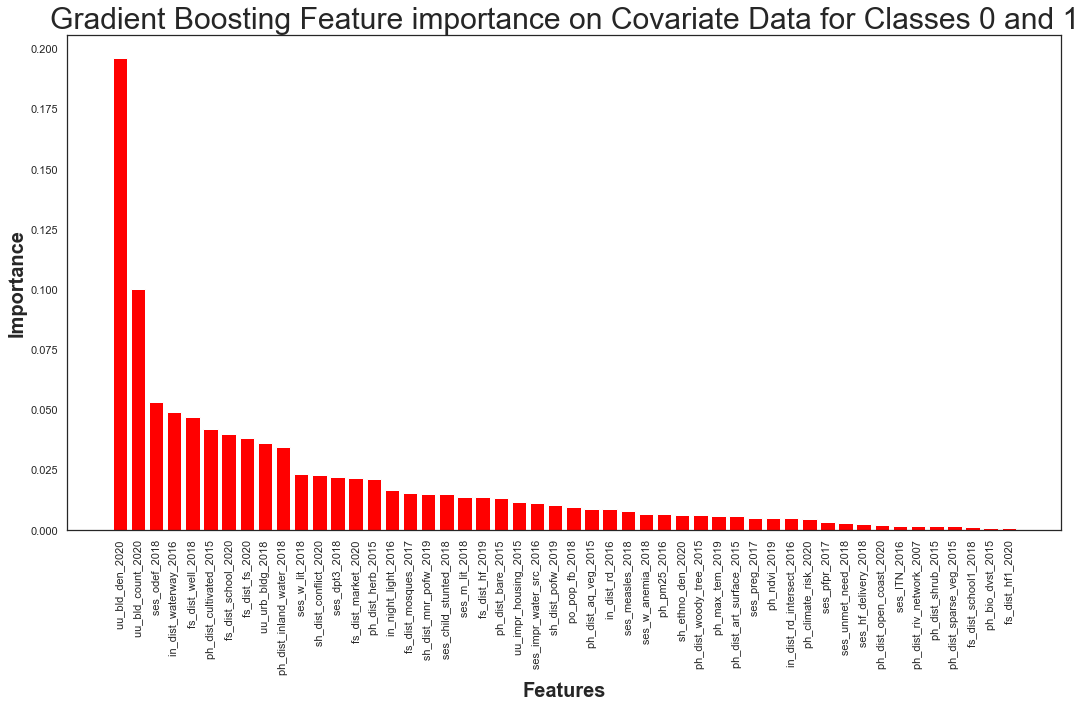

In [57]:
#Create a figure
fig = plt.figure(figsize=(15, 10))

# Implement me
# The bar plot of the top 5 feature importance
plt.bar(df_fi_gb_0_1['Features'][:50], df_fi_gb_0_1['Importance'][:50], color='red')

# Set x-axis
plt.title('Gradient Boosting Feature importance on Covariate Data for Classes 0 and 1', fontsize=30)
plt.xlabel('Features',fontsize=20)
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('Importance',fontsize=20)

# Save and show the figure
plt.tight_layout()
plt.show()

# AdaBoosting on Testing Data

In [58]:
# hyper parameters for testing
parameter_space = {
    'n_estimators': [50, 100, 150, 200],
    "learning_rate": [0.01, 0.05, 0.025]
}

clf = AdaBoostClassifier(random_state=42)

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []
# Run Gridsearch
gs = GridSearchCV(clf, parameter_space,
                      scoring='f1_macro',
                      n_jobs=-1,
                      cv=StratifiedKFold(),
                      return_train_score=True)


# run model
gs = gs.fit(X_train_scaled, y_train)

# Update best_score_params_estimator_gs
best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
# Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
# Get the important columns in cv_results
important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
# Move the important columns ahead
cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]


# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

best_score                                    best_param  \
0  0.863761    {'learning_rate': 0.05, 'n_estimators': 200}   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [59]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]


In [60]:
#best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Predict using test data
y_test_pred = best_estimator_gs.predict(X_test_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision  \
0  [0.9901800327332242, 0.9743589743589743]   

                                     Recall  \
0  [0.9996695307336417, 0.5588235294117647]   

                                   F1-score  
0  [0.9949021542509454, 0.7102803738317757]

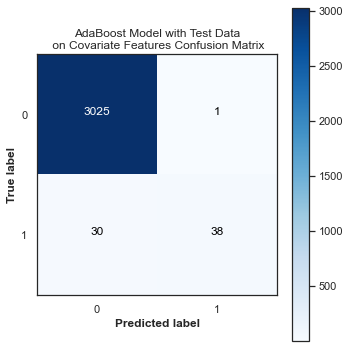

In [61]:
sns.set(style="white")
cnf_matrix = confusion_matrix(y_test, y_test_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1"]
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.title('AdaBoost Model with Test Data\n on Covariate Features Confusion Matrix')
plt.tight_layout()
plt.show()

In [62]:
print('AdaBoost Model with Testing Data\n on Covariate Features Classification Report') 
print(classification_report(y_test,y_test_pred))

AdaBoost Model with Testing Data
 on Covariate Features Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3026
           1       0.97      0.56      0.71        68

    accuracy                           0.99      3094
   macro avg       0.98      0.78      0.85      3094
weighted avg       0.99      0.99      0.99      3094



# AdaBoosting on Validation Data

In [63]:
#best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Predict using test data
y_val_pred = best_estimator_gs.predict(X_val_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_val, y_val_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision                     Recall  \
0  [0.9941195687683764, 1.0]  [1.0, 0.6470588235294118]   

                                   F1-score  
0  [0.9970511140235911, 0.7857142857142858]

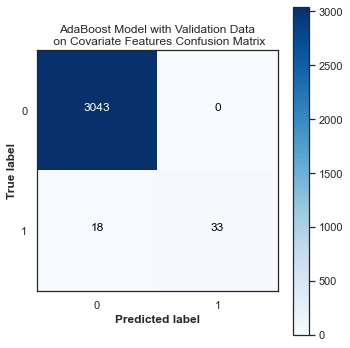

In [64]:
sns.set(style="white")
cnf_matrix = confusion_matrix(y_val, y_val_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1"]
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.title('AdaBoost Model with Validation Data\n on Covariate Features Confusion Matrix')
plt.tight_layout()
plt.show()

In [65]:
print('AdaBoost Model with Validation Data\n on Covariate Features Classification Report') 
print(classification_report(y_val,y_val_pred))

AdaBoost Model with Validation Data
 on Covariate Features Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3043
           1       1.00      0.65      0.79        51

    accuracy                           0.99      3094
   macro avg       1.00      0.82      0.89      3094
weighted avg       0.99      0.99      0.99      3094



# AdaBoosting Feature Importance

In [66]:
target="label"
# Get the best_score, best_param and best_estimator of random forest obtained by GridSearchCV
best_score_ad, best_param_ad, best_estimator_ad = best_score_params_estimator_gs[0]

# Get the dataframe of feature and importance
df_fi_ad_0_1 = pd.DataFrame(np.hstack((np.setdiff1d(X.columns, [target]).reshape(-1, 1), best_estimator_ad.feature_importances_.reshape(-1, 1))),
                         columns=['Features', 'Importance'])

In [67]:
# Sort df_fi_rfc in descending order of the importance
df_fi_ad_0_1 = df_fi_ad_0_1.sort_values(ascending=False, by='Importance').reset_index(drop=True)

# Print the first 5 rows of df_fi_rfc
df_fi_ad_0_1.head()

#save results as csv
df_fi_ad_0_1.to_csv(path_or_buf='feature_selection/Covariate/' + 'Covariate_best_ada_boosting_features_0_1.csv',index=False)

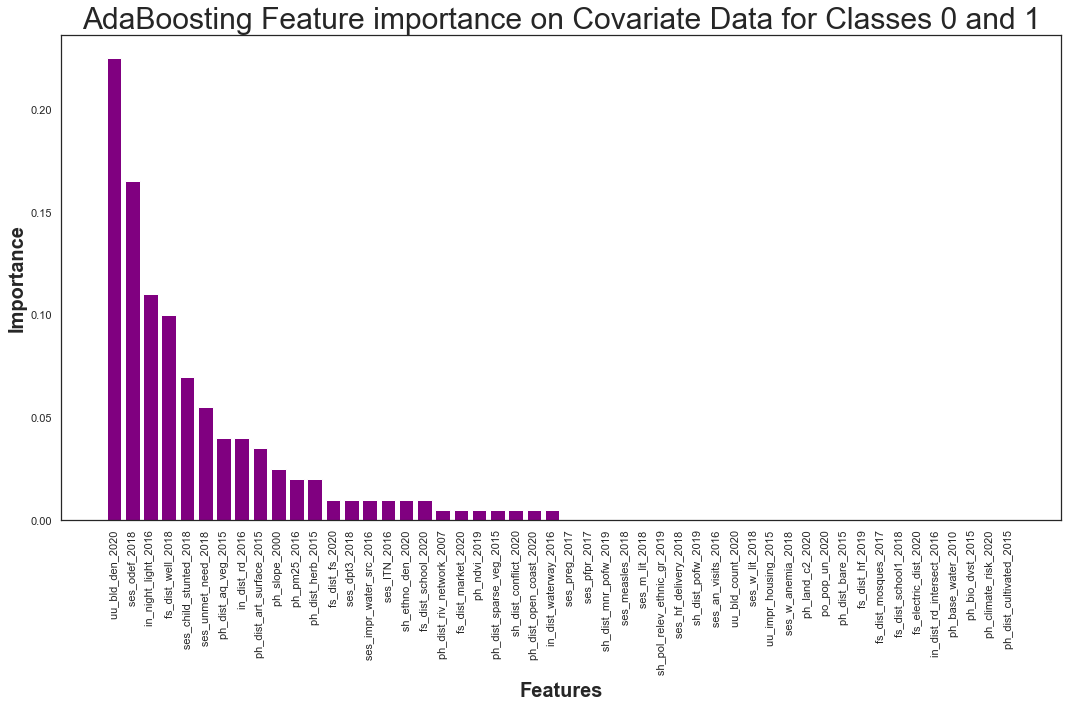

In [68]:
#Create a figure
fig = plt.figure(figsize=(15, 10))

# Implement me
# The bar plot of the top 5 feature importance
plt.bar(df_fi_ad_0_1['Features'][:50], df_fi_ad_0_1['Importance'][:50], color='purple')

# Set x-axis
plt.title('AdaBoosting Feature importance on Covariate Data for Classes 0 and 1', fontsize=30)
plt.xlabel('Features',fontsize=20)
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('Importance',fontsize=20)

# Save and show the figure
plt.tight_layout()
plt.show()

In [69]:
df_fi_ad_0_1.head()


Features Importance
0   uu_bld_den_2020         0.225    
1   ses_odef_2018           0.165    
2   in_night_light_2016     0.11     
3   fs_dist_well_2018       0.1      
4   ses_child_stunted_2018  0.07

# Comparing Feature Selections of Different Models

In [70]:
# Random Forest feature importance two classes
df_fi_rfc_0_1 = df_fi_rfc_0_1.rename(columns = {'Features':'Covariate_features','Importance':'values'})
df_fi_rfc_0_1['top_Random_Forest_0_1']= range(1,len(df_fi_rfc_0_1)+1)
#df_fi_rfc_0_1.drop(['values'],axis=1, inplace=True)
df_fi_rfc_0_1.head()

Covariate_features    values  top_Random_Forest_0_1
0   uu_bld_den_2020          0.119095  1                    
1   uu_bld_count_2020        0.076437  2                    
2   ph_dist_cultivated_2015  0.046593  3                    
3   in_dist_waterway_2016    0.039785  4                    
4   ph_dist_aq_veg_2015      0.034857  5

In [71]:
# logisitc featue importance for two classes
best_log['top_logistic_0_1'] = range(1,len(best_log)+1)
#best_log.drop(['values'],axis=1, inplace=True)
best_log.head()

Covariate_features       values  top_logistic_0_1
0   ses_odef_2018              1050.671279  1               
1   ses_impr_water_src_2016    484.132542   2               
2   in_dist_rd_intersect_2016  244.741557   3               
3   ses_w_anemia_2018          37.738917    4               
4   fs_dist_school_2020        15.244518    5

In [72]:
# Gradient Boosting feature importance for two classes
df_fi_gb_0_1 = df_fi_gb_0_1.rename(columns = {'Features':'Covariate_features','Importance':'values'})
df_fi_gb_0_1['top_Gradient_Boosting_0_1']= range(1,len(df_fi_gb_0_1)+1)
#df_fi_gb_0_1.drop(['values'],axis=1, inplace=True)
df_fi_gb_0_1.head()

Covariate_features    values  top_Gradient_Boosting_0_1
0   uu_bld_den_2020        0.196033  1                        
1   uu_bld_count_2020      0.100384  2                        
2   ses_odef_2018          0.053329  3                        
3   in_dist_waterway_2016  0.049252  4                        
4   fs_dist_well_2018      0.046982  5

In [73]:
df_fi_ad_0_1 = df_fi_ad_0_1.rename(columns = {'Features':'Covariate_features','Importance':'values'})
df_fi_ad_0_1['top_Ada_Boosting_0_1']= range(1,len(df_fi_ad_0_1)+1)
#df_fi_gb_0_1.drop(['values'],axis=1, inplace=True)
df_fi_ad_0_1.head()

Covariate_features values  top_Ada_Boosting_0_1
0   uu_bld_den_2020         0.225  1                   
1   ses_odef_2018           0.165  2                   
2   in_night_light_2016     0.11   3                   
3   fs_dist_well_2018       0.1    4                   
4   ses_child_stunted_2018  0.07   5

In [74]:
m_info_0_1['minfo_0_1'] = range(1,len(m_info_0_1)+1)
m_info_0_1.head()

Covariate_features    values  minfo_0_1
0   ph_dist_bare_2015     0.044912  1        
1   ph_climate_risk_2020  0.044740  2        
2   in_night_light_2016   0.043952  3        
3   uu_bld_den_2020       0.037878  4        
4   ses_hf_delivery_2018  0.037027  5

In [75]:
#merge best features for all three methods 
best_0 = best_log.merge(df_fi_rfc_0_1[['Covariate_features','top_Random_Forest_0_1']],how='inner', on = 'Covariate_features')
best_1 = best_0.merge(df_fi_gb_0_1[['Covariate_features','top_Gradient_Boosting_0_1']],how='inner',on = 'Covariate_features')
best_2 = best_1.merge(df_fi_ad_0_1[['Covariate_features','top_Ada_Boosting_0_1']],how='inner',on = 'Covariate_features')
best = best_2.merge(m_info_0_1[['Covariate_features','minfo_0_1']],how='inner',on = 'Covariate_features')
#create rank column
best['combined_rank'] = best['top_logistic_0_1'] + best['top_Random_Forest_0_1'] + best['top_Gradient_Boosting_0_1'] + best['top_Ada_Boosting_0_1'] + best['minfo_0_1']

best = best.sort_values(by= ['combined_rank'], ascending =True).reset_index(drop=True)
best['rank']= range(1,len(best)+1)
del best['values']
best.head(60)

Covariate_features  top_logistic_0_1  top_Random_Forest_0_1  \
0    uu_bld_den_2020              24                1                       
1    ses_odef_2018                1                 13                      
2    ses_impr_water_src_2016      2                 9                       
3    uu_bld_count_2020            25                2                       
4    ses_dpt3_2018                18                17                      
5    ph_dist_aq_veg_2015          13                5                       
6    ph_dist_herb_2015            10                26                      
7    ph_dist_cultivated_2015      11                3                       
8    ses_child_stunted_2018       22                24                      
9    ses_measles_2018             7                 23                      
10   in_dist_waterway_2016        43                4                       
11   in_night_light_2016          56                28                      
12   ses_w_lit_2018               36                15                      
13   fs_dist_school_2020          5                 35                      
14   ses_unmet_need_2018          15                31                      
15   ses_w_anemia_2018            4                 29                      
16   fs_dist_well_2018            47                21                      
17   ph_dist_art_surface_2015     8                 38                      
18   sh_dist_conflict_2020        27                20                      
19   ph_dist_bare_2015            52                7                       
20   sh_dist_mnr_pofw_2019        46                12                      
21   ph_max_tem_2019              14                14                      
22   ses_m_lit_2018               53                11                      
23   ses_an_visits_2016           6                 25                      
24   ph_climate_risk_2020         21                19                      
25   uu_impr_housing_2015         26                27                      
26   ph_dist_sparse_veg_2015      55                6                       
27   fs_dist_market_2020          9                 46                      
28   ses_pfpr_2017                12                42                      
29   in_dist_rd_2016              28                34                      
30   ses_hf_delivery_2018         54                16                      
31   ph_dist_inland_water_2018    42                18                      
32   ph_pm25_2016                 19                45                      
33   fs_dist_fs_2020              58                36                      
34   ph_dist_woody_tree_2015      34                8                       
35   in_dist_rd_intersect_2016    3                 37                      
36   po_pop_fb_2018               23                44                      
37   ph_dist_open_coast_2020      49                22                      
38   fs_dist_hf_2019              16                39                      
39   ses_ITN_2016                 59                40                      
40   ph_dist_riv_network_2007     32                48                      
41   fs_dist_mosques_2017         51                30                      
42   sh_dist_pofw_2019            60                33                      
43   ph_dist_shrub_2015           48                10                      
44   ph_ndvi_2019                 17                52                      
45   ses_preg_2017                40                47                      
46   uu_urb_bldg_2018             29                57                      
47   fs_dist_school1_2018         33                32                      
48   sh_ethno_den_2020            50                50                      
49   sh_pol_relev_ethnic_gr_2019  35                51                      
50   ph_slope_2000                30                56                      
51   po_po

In [76]:
# save file 
best.to_csv(path_or_buf='feature_selection/Covariate/' + 'Covariate_Features_Ranking.csv',index=False)



In [77]:
best['max'] = best[["top_logistic_0_1", "top_Random_Forest_0_1",
                    "top_Gradient_Boosting_0_1","top_Ada_Boosting_0_1","minfo_0_1"]].max(axis=1)
best['min'] = best[["top_logistic_0_1", "top_Random_Forest_0_1",
                    "top_Gradient_Boosting_0_1","top_Ada_Boosting_0_1","minfo_0_1"]].min(axis=1)
best.head(60)

Covariate_features  top_logistic_0_1  top_Random_Forest_0_1  \
0    uu_bld_den_2020              24                1                       
1    ses_odef_2018                1                 13                      
2    ses_impr_water_src_2016      2                 9                       
3    uu_bld_count_2020            25                2                       
4    ses_dpt3_2018                18                17                      
5    ph_dist_aq_veg_2015          13                5                       
6    ph_dist_herb_2015            10                26                      
7    ph_dist_cultivated_2015      11                3                       
8    ses_child_stunted_2018       22                24                      
9    ses_measles_2018             7                 23                      
10   in_dist_waterway_2016        43                4                       
11   in_night_light_2016          56                28                      
12   ses_w_lit_2018               36                15                      
13   fs_dist_school_2020          5                 35                      
14   ses_unmet_need_2018          15                31                      
15   ses_w_anemia_2018            4                 29                      
16   fs_dist_well_2018            47                21                      
17   ph_dist_art_surface_2015     8                 38                      
18   sh_dist_conflict_2020        27                20                      
19   ph_dist_bare_2015            52                7                       
20   sh_dist_mnr_pofw_2019        46                12                      
21   ph_max_tem_2019              14                14                      
22   ses_m_lit_2018               53                11                      
23   ses_an_visits_2016           6                 25                      
24   ph_climate_risk_2020         21                19                      
25   uu_impr_housing_2015         26                27                      
26   ph_dist_sparse_veg_2015      55                6                       
27   fs_dist_market_2020          9                 46                      
28   ses_pfpr_2017                12                42                      
29   in_dist_rd_2016              28                34                      
30   ses_hf_delivery_2018         54                16                      
31   ph_dist_inland_water_2018    42                18                      
32   ph_pm25_2016                 19                45                      
33   fs_dist_fs_2020              58                36                      
34   ph_dist_woody_tree_2015      34                8                       
35   in_dist_rd_intersect_2016    3                 37                      
36   po_pop_fb_2018               23                44                      
37   ph_dist_open_coast_2020      49                22                      
38   fs_dist_hf_2019              16                39                      
39   ses_ITN_2016                 59                40                      
40   ph_dist_riv_network_2007     32                48                      
41   fs_dist_mosques_2017         51                30                      
42   sh_dist_pofw_2019            60                33                      
43   ph_dist_shrub_2015           48                10                      
44   ph_ndvi_2019                 17                52                      
45   ses_preg_2017                40                47                      
46   uu_urb_bldg_2018             29                57                      
47   fs_dist_school1_2018         33                32                      
48   sh_ethno_den_2020            50                50                      
49   sh_pol_relev_ethnic_gr_2019  35                51                      
50   ph_slope_2000                30                56                      
51   po_po

In [110]:
best[0:10]


Covariate_features  top_logistic_0_1  top_Random_Forest_0_1  \
0   uu_bld_den_2020          24                1                       
1   ses_odef_2018            1                 13                      
2   ses_impr_water_src_2016  2                 9                       
3   uu_bld_count_2020        25                2                       
4   ses_dpt3_2018            18                17                      
5   ph_dist_aq_veg_2015      13                5                       
6   ph_dist_herb_2015        10                26                      
7   ph_dist_cultivated_2015  11                3                       
8   ses_child_stunted_2018   22                24                      
9   ses_measles_2018         7                 23                      

   top_Gradient_Boosting_0_1  top_Ada_Boosting_0_1  minfo_0_1  combined_rank  \
0  1                          1                     4          31              
1  3                          2                     14         33              
2  24                         15                    21         71              
3  2                          35                    7          71              
4  13                         14                    17         79              
5  27                         7                     38         90              
6  15                         12                    28         91              
7  6                          50                    24         94              
8  19                         5                     30         100             
9  29                         29                    12         100             

   rank  max  min  
0  1     24   1    
1  2     14   1    
2  3     24   2    
3  4     35   2    
4  5     18   13   
5  6     38   5    
6  7     28   10   
7  8     50   3    
8  9     30   5    
9  10    29   7